In [8]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
%matplotlib notebook

In [9]:
basepath = '/Users/blandt/Desktop/Data/Optogenetics/Optogenetics December 2021/Experiment'
paths = direcslist(basepath, 2)

In [10]:
imgs = [load_image(p + '/rfp_channel_flat.tif') for p in paths]
rois = [np.loadtxt(p + '/../ROI.txt') for p in paths]

In [11]:
iq = ImageQuant(img=imgs, roi=rois, sigma=3.5, descent_steps=350, rol_ave=5, 
                lr=0.01, iterations=3, fit_outer=True, roi_knots=20)
iq.run()

100%|██████████| 350/350 [00:11<00:00, 29.25it/s]


Time elapsed: 37.51 seconds 


<IPython.core.display.Javascript object>


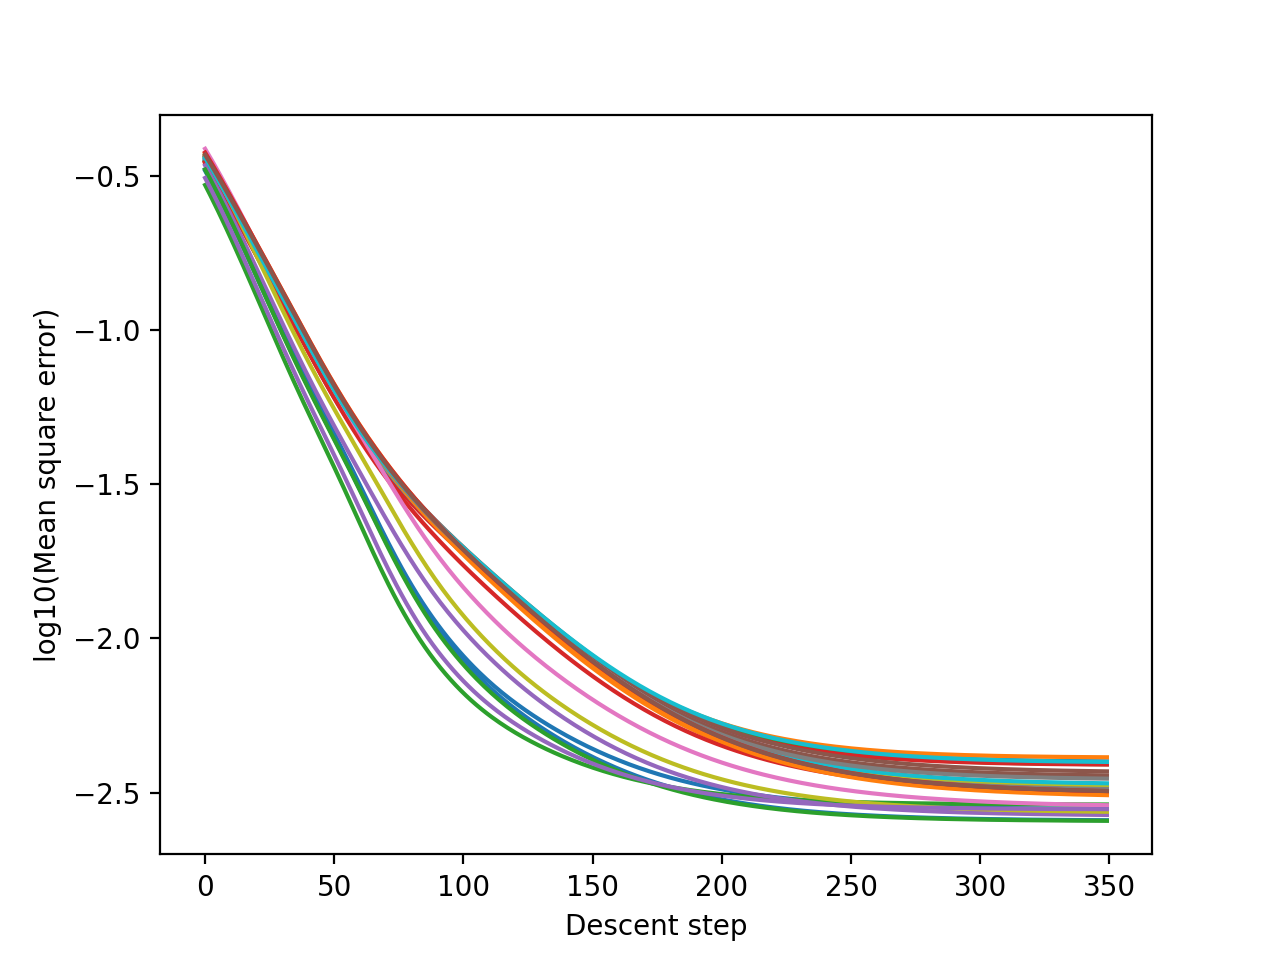

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

In [15]:
iq.plot_losses(log=True)

<IPython.core.display.Javascript object>


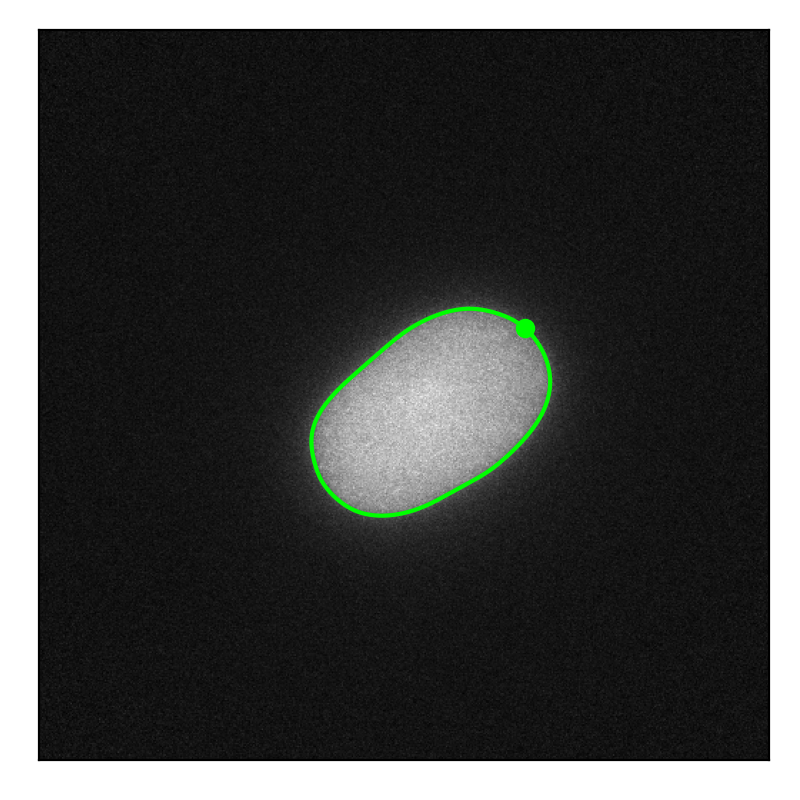

interactive(children=(IntSlider(value=0, description='Frame', max=25), Output()), _dom_classes=('widget-intera…

(<Figure size 400x400 with 1 Axes>, <AxesSubplot:>)

In [16]:
iq.plot_segmentation(jupyter=True)

In [17]:
[np.savetxt(p + '/ROI_fit.txt', r) for p, r in zip(paths, iq.roi)];